In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from itertools import product
import warnings
warnings.filterwarnings("ignore")



In [ ]:
# Load and preprocess the data
df = pd.read_csv("factorder.csv")
df_new=df.copy()
df['DateOrderedKey'] = pd.to_datetime(df['DateOrderedKey'], format='%Y%m%d')
df['Month'] = df['DateOrderedKey'].dt.to_period('M')
df = df[['QuantityOrdered', 'ArticleGroupName', 'Month']].dropna()
df_grouped = df.groupby(['ArticleGroupName', 'Month']).sum().reset_index()
pivot_table = df_grouped.pivot(index='Month', columns='ArticleGroupName', values='QuantityOrdered').fillna(0)


In [ ]:
pivot_table

In [ ]:
# Plot actual values
plt.figure(figsize=(12, 6))
plt.plot(pivot_table.index.astype(str), pivot_table.sum(axis=1), label='Actual')

plt.xticks(rotation = 90)
plt.xlabel('Month')
plt.ylabel('QuantityOrdered')
plt.legend()
plt.show()

In [ ]:

train_size = int(len(pivot_table) * 0.85)
train_data, test_data = pivot_table[:train_size], pivot_table[train_size:]
test_data



In [ ]:
df

In [ ]:
df_new['DateOrderedKey'] = df_new['DateOrderedKey'].astype(str)
df_new.DateOrderedKey =  pd.to_datetime(df_new['DateOrderedKey'], format= '%Y-%m-%d')
df1 = df_new.groupby(['DateOrderedKey', 'ArticleGroupName']).sum('QuantityOrdered').fillna(0)
df1 = df1.reset_index()
df1 = df1[['DateOrderedKey', 'QuantityOrdered', 'ArticleGroupName']]

df1




In [ ]:


ts_month_avg = df1.set_index('DateOrderedKey')['QuantityOrdered'].resample('M').sum()
ts_month_avg
ts_month_avg.plot(figsize = (20, 6))
plt.show()

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(ts_month_avg, model='additive')
fig = decomposition.plot()
plt.show()

In [146]:

from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)




In [147]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
      kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [148]:
#time series data is stationary
print(adf_test(ts_month_avg))
print(kpss_test(ts_month_avg))

Results of Dickey-Fuller Test:
Test Statistic                 -3.465029
p-value                         0.008932
#Lags Used                      1.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64
None
Results of KPSS Test:
Test Statistic           0.155397
p-value                  0.100000
Lags Used                2.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64
None


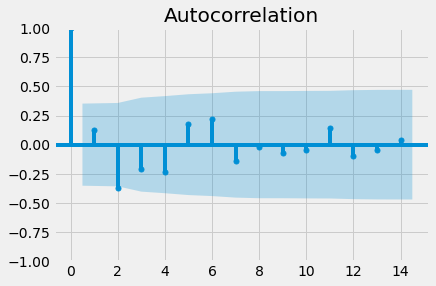

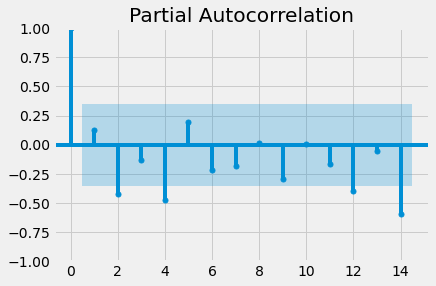

In [149]:
# Plotting the ACF and PACF Plot of the Trend and Seasonally adjusted Time Series data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import matplotlib
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts_t_adj, lags=14)
matplotlib.pyplot.show()
plot_pacf(ts_t_adj, lags = 14)
matplotlib.pyplot.show()

In [150]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')



# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
simple_pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(i[0], i[1], i[2], 12) for i in list(itertools.product(p, d, q))]

print('Parameter combinations for Seasonal ARIMA...')

warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in simple_pdq:
    for param_seasonal in seasonal_pdq:
        try:
            for column in train_data.columns:
                 mod = sm.tsa.statespace.SARIMAX(train_data[column],
                                            order=param,
                                            )

                 results = mod.fit()

                 print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
                  

Parameter combinations for Seasonal ARIMA...
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:548.2383259174536
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:535.1897389626179
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:598.4608288982452
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:151.9392991198478
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:579.8144767036215
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:199.5221360296607
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:365.83965184970856
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:296.36440629785716
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:453.7858636135799
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:550.333827464754
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:490.49136920173953
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:70.5198567968932
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:804.771776672877
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:576.8169592664985
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:207.66741716096678
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:508.8079456056219
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:295.2710433699428
ARIMA(0, 0, 0)x(0, 

In [151]:
best_model = SARIMAX(train_data[column], order=(0, 1, 1), seasonal_order=(0, 0, 0, 12)).fit()
print(best_model.summary())

                               SARIMAX Results                                
Dep. Variable:        Övriga intäkter   No. Observations:                   27
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -173.963
Date:                Wed, 31 May 2023   AIC                            351.925
Time:                        13:35:24   BIC                            354.442
Sample:                    01-31-2018   HQIC                           352.650
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9984     19.412     -0.051      0.959     -39.046      37.049
sigma2      3.353e+04   6.46e+05      0.052      0.959   -1.23e+06     1.3e+06
Ljung-Box (L1) (Q):                   0.49   Jarque-

In [152]:

    predicted_values = pd.DataFrame()
    for column in pivot_table.columns:
        predicted_values[column] = best_model.predict(start=pivot_table.index[0], end=pivot_table.index[-1])
    print(predicted_values)

         ACCESSORIES  BODY AND ONESIE     BOTTOMS  Cancellation fee  \
2018-01     0.000000         0.000000    0.000000          0.000000   
2018-02    89.113462        89.113462   89.113462         89.113462   
2018-03    49.203063        49.203063   49.203063         49.203063   
2018-04    45.838357        45.838357   45.838357         45.838357   
2018-05    69.189873        69.189873   69.189873         69.189873   
2018-06    57.825352        57.825352   57.825352         57.825352   
2018-07    50.560184        50.560184   50.560184         50.560184   
2018-08    49.485098        49.485098   49.485098         49.485098   
2018-09    46.685675        46.685675   46.685675         46.685675   
2018-10    44.506101        44.506101   44.506101         44.506101   
2018-11   135.267844       135.267844  135.267844        135.267844   
2018-12   124.184272       124.184272  124.184272        124.184272   
2019-01   116.605258       116.605258  116.605258        116.605258   
2019-0

In [153]:
# Calculate MAPE for the best model

pivot_table=pivot_table.fillna(0)
predicted_values=predicted_values.fillna(0)
#pivot_table = df_grouped.pivot(index='Month', columns='ArticleGroupName', values='QuantityOrdered').fillna(0)
mape = mean_absolute_percentage_error(pivot_table, predicted_values)

print("MAPE for the best model:", mape)

MSE = mean_squared_error(pivot_table, predicted_values)
print('The Mean square error for the SARIMAX model is', MSE)

rmse=np.sqrt(MSE)
print('The root mean square  error for the SARIMAX model is',rmse)


MAPE for the best model: 7.272293550610368e+16
The Mean square error for the SARIMAX model is 19293695748.74111
The root mean square  error for the SARIMAX model is 138901.74854457777


In [156]:
predicted_values

,ACCESSORIES,BODY AND ONESIE,BOTTOMS,Cancellation fee,DRESSES,Discount,ECOM return cost,Externa presentkort,Giftwrapping,HATS,...,Koncerndebitering,Not Available,OUTERWEAR,Provisionsintäkter/Commission,SWIMWEAR,Shipment,Stuff,TOPS,VAT,Övriga intäkter
2018-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-02,89.113462,89.113462,89.113462,89.113462,89.113462,89.113462,89.113462,89.113462,89.113462,89.113462,...,89.113462,89.113462,89.113462,89.113462,89.113462,89.113462,89.113462,89.113462,89.113462,89.113462
2018-03,49.203063,49.203063,49.203063,49.203063,49.203063,49.203063,49.203063,49.203063,49.203063,49.203063,...,49.203063,49.203063,49.203063,49.203063,49.203063,49.203063,49.203063,49.203063,49.203063,49.203063
2018-04,45.838357,45.838357,45.838357,45.838357,45.838357,45.838357,45.838357,45.838357,45.838357,45.838357,...,45.838357,45.838357,45.838357,45.838357,45.838357,45.838357,45.838357,45.838357,45.838357,45.838357
2018-05,69.189873,69.189873,69.189873,69.189873,69.189873,69.189873,69.189873,69.189873,69.189873,69.189873,...,69.189873,69.189873,69.189873,69.189873,69.189873,69.189873,69.189873,69.189873,69.189873,69.189873
2018-06,57.825352,57.825352,57.825352,57.825352,57.825352,57.825352,57.825352,57.825352,57.825352,57.825352,...,57.825352,57.825352,57.825352,57.825352,57.825352,57.825352,57.825352,57.825352,57.825352,57.825352
2018-07,50.560184,50.560184,50.560184,50.560184,50.560184,50.560184,50.560184,50.560184,50.560184,50.560184,...,50.560184,50.560184,50.560184,50.560184,50.560184,50.560184,50.560184,50.560184,50.560184,50.560184
2018-08,49.485098,49.485098,49.485098,49.485098,49.485098,49.485098,49.485098,49.485098,49.485098,49.485098,...,49.485098,49.485098,49.485098,49.485098,49.485098,49.485098,49.485098,49.485098,49.485098,49.485098
2018-09,46.685675,46.685675,46.685675,46.685675,46.685675,46.685675,46.685675,46.685675,46.685675,46.685675,...,46.685675,46.685675,46.685675,46.685675,46.685675,46.685675,46.685675,46.685675,46.685675,46.685675
2018-10,44.506101,44.506101,44.506101,44.506101,44.506101,44.506101,44.506101,44.506101,44.506101,44.506101,...,44.506101,44.506101,44.506101,44.506101,44.506101,44.506101,44.506101,44.506101,44.506101,44.506101


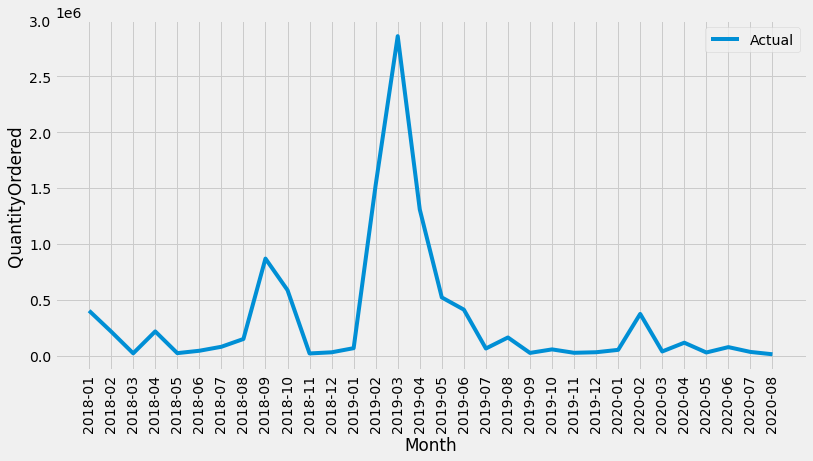

In [160]:
plt.figure(figsize=(12, 6))

plt.plot(pivot_table.index.astype(str), pivot_table.sum(axis=1), label='Actual')

plt.xticks(rotation = 90)
plt.xlabel('Month')
plt.ylabel('QuantityOrdered')
plt.legend()
plt.show()

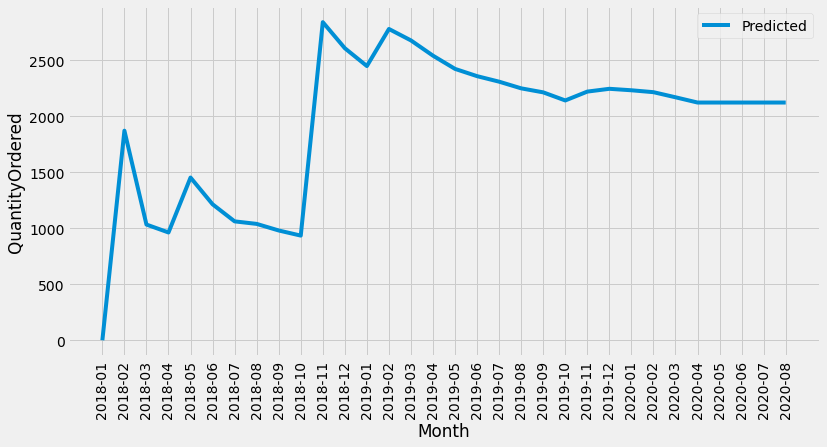

In [161]:
plt.figure(figsize=(12, 6))

plt.plot(predicted_values.index.astype(str), predicted_values.sum(axis=1), label='Predicted')

plt.xticks(rotation = 90)
plt.xlabel('Month')
plt.ylabel('QuantityOrdered')
plt.legend()
plt.show()